In [192]:
import pandas as pd
import matplotlib.pyplot as plt

import torch

In [193]:
norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot/MAML+Arbiter_5way_5shot_inner_loop.csv')
# norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot_filter64_7105/MAML+Arbiter_5way_5shot_filter64_inner_loop.csv')

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [194]:
norm_info_train = norm_info[norm_info['phase']=='train']
norm_info_val = norm_info[norm_info['phase']=='val']
norm_info_test= norm_info[norm_info['current_iter']=='test']

In [195]:
per_inner_loop_step = norm_info_train.groupby('num_step').mean()

In [196]:
specific_column_values = norm_info_train[norm_info_train['num_step'] == 0]
specific_column_values

,current_iter,phase,num_step,layer_dict.conv0.conv.weight_alpha,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,...,layer_dict.linear.weights_weight_var,layer_dict.linear.bias_alpha,layer_dict.linear.bias_grad_mean,layer_dict.linear.bias_grad_L1norm,layer_dict.linear.bias_grad_L2norm,layer_dict.linear.bias_grad_var,layer_dict.linear.bias_weight_mean,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var
0,0,train,0,9.759704e-01,4.850590e-05,3.748490e+01,9.759703e-01,2.756903e-04,-0.000919,124.344971,...,0.000630,1.035130e+00,2.384186e-08,1.847870e+00,1.035130e+00,2.678736e-01,0.000000,0.000000,0.000000,0.000000e+00
5,0,train,0,9.581059e-01,-2.281474e-04,3.892489e+01,9.581059e-01,2.656402e-04,-0.000919,124.344971,...,0.000630,1.023365e+00,-1.192093e-08,1.829140e+00,1.023365e+00,2.618192e-01,0.000000,0.000000,0.000000,0.000000e+00
10,1,train,0,9.638797e-01,-1.141872e-03,3.384235e+01,9.638798e-01,2.676000e-04,-0.000922,124.346458,...,0.000630,1.047567e+00,0.000000e+00,1.867119e+00,1.047567e+00,2.743492e-01,0.000060,0.000500,0.000224,7.999998e-09
15,1,train,0,9.563836e-01,1.353143e-04,3.710754e+01,9.563836e-01,2.647196e-04,-0.000922,124.346458,...,0.000630,1.047063e+00,0.000000e+00,1.867580e+00,1.047063e+00,2.740851e-01,0.000060,0.000500,0.000224,7.999998e-09
20,2,train,0,9.210126e-01,-1.328030e-03,3.591239e+01,9.210126e-01,2.437537e-04,-0.000921,124.344238,...,0.000630,1.046633e+00,0.000000e+00,1.855690e+00,1.046633e+00,2.738600e-01,0.000110,0.000941,0.000423,2.954825e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196975,74997,train,0,2.455602e-09,-2.682056e-13,9.101054e-08,2.455601e-09,1.745219e-21,-0.000344,142.291687,...,0.000544,2.456720e-10,0.000000e+00,4.728692e-10,2.456720e-10,1.508868e-20,-0.001650,0.024109,0.012284,3.432235e-05
1196980,74998,train,0,2.549407e-09,7.545334e-12,8.479365e-08,2.549407e-09,1.824232e-21,-0.000342,142.292847,...,0.000544,2.579113e-10,5.551115e-18,5.226722e-10,2.579113e-10,1.662956e-20,-0.001653,0.024075,0.012266,3.420206e-05
1196985,74998,train,0,2.477142e-09,-6.236251e-12,9.193224e-08,2.477142e-09,1.737142e-21,-0.000342,142.292847,...,0.000544,2.443686e-10,-8.326673e-18,4.897757e-10,2.443687e-10,1.492901e-20,-0.001653,0.024075,0.012266,3.420206e-05
1196990,74999,train,0,2.552599e-09,-9.042965e-12,8.608653e-08,2.552599e-09,1.804095e-21,-0.000340,142.294006,...,0.000544,2.533448e-10,-1.110223e-17,5.199768e-10,2.533448e-10,1.604590e-20,-0.001655,0.024058,0.012256,3.413035e-05


In [197]:
gr = specific_column_values.groupby('current_iter').mean()

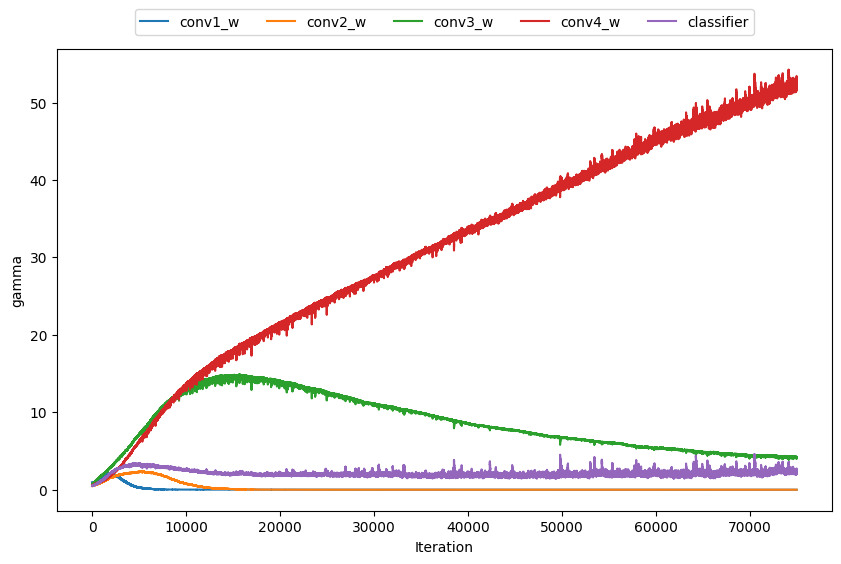

In [198]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = ['layer_dict.conv0.conv.weight_alpha', 
                   'layer_dict.conv1.conv.weight_alpha',
                   'layer_dict.conv2.conv.weight_alpha',
                   'layer_dict.conv3.conv.weight_alpha',
                   'layer_dict.linear.weights_alpha']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.xlabel('Iteration')  # X 축 라벨 설정
plt.ylabel('gamma')  


#plt.ylim(0, 100)


plt.show()  # 그래프 보여주기

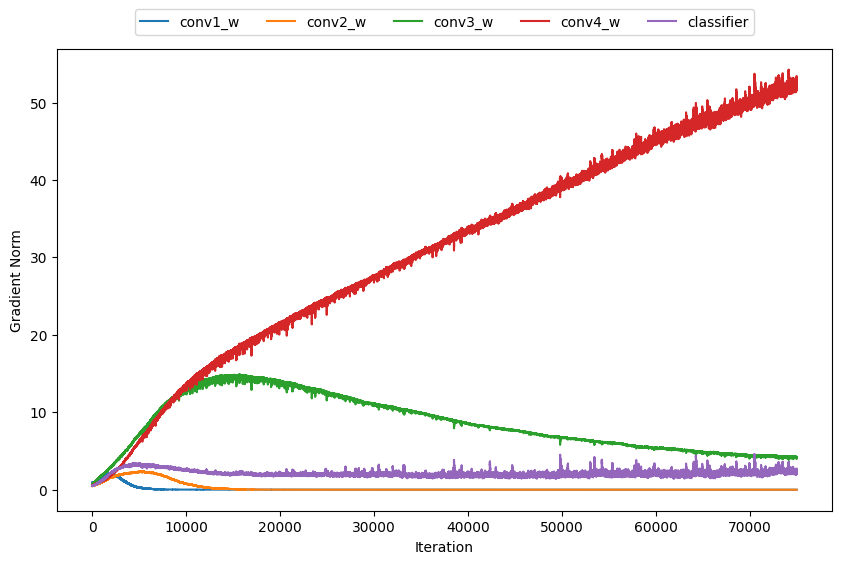

In [199]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_L2norm', 
                    'layer_dict.conv1.conv.weight_grad_L2norm', 
                    'layer_dict.conv2.conv.weight_grad_L2norm',
                    'layer_dict.conv3.conv.weight_grad_L2norm',
                    'layer_dict.linear.weights_grad_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.xlabel('Iteration')  # X 축 라벨 설정
plt.ylabel('Gradient Norm')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

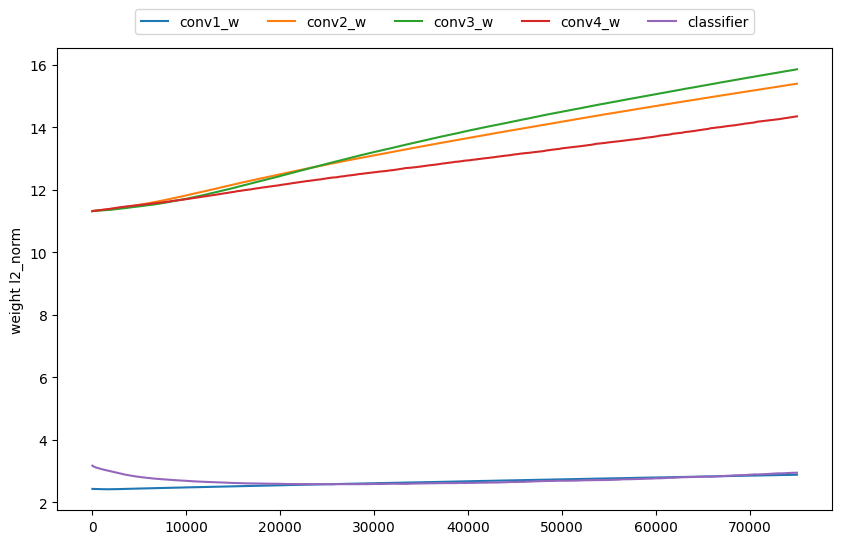

In [200]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_L2norm', 
                    'layer_dict.conv1.conv.weight_weight_L2norm', 
                    'layer_dict.conv2.conv.weight_weight_L2norm',
                    'layer_dict.conv3.conv.weight_weight_L2norm',
                    'layer_dict.linear.weights_weight_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight l2_norm')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

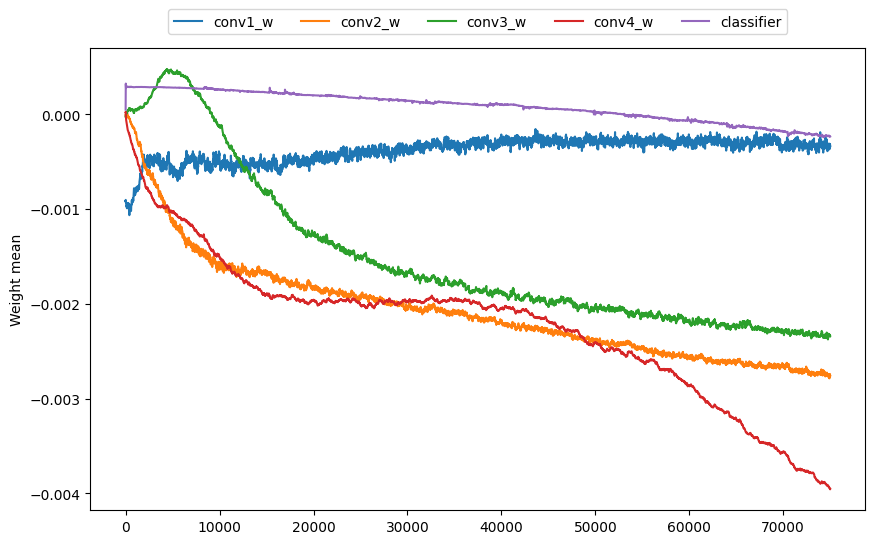

In [201]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_mean', 
                    'layer_dict.conv1.conv.weight_weight_mean', 
                    'layer_dict.conv2.conv.weight_weight_mean',
                    'layer_dict.conv3.conv.weight_weight_mean',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Weight mean')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

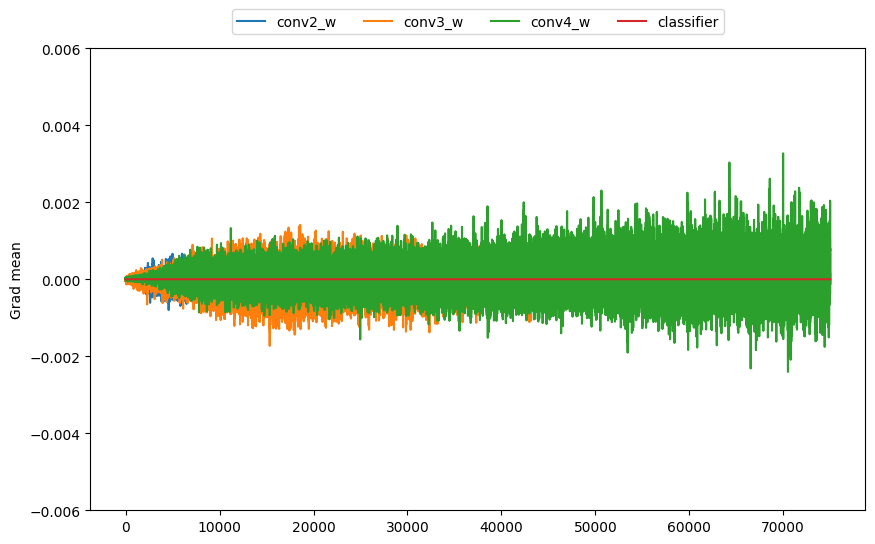

In [214]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ #'layer_dict.conv0.conv.weight_grad_mean', 
                    'layer_dict.conv1.conv.weight_grad_mean', 
                    'layer_dict.conv2.conv.weight_grad_mean',
                    'layer_dict.conv3.conv.weight_grad_mean',
                    'layer_dict.linear.weights_grad_mean']
columns_to_plot_label = [#'conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Grad mean')  

# MAML의 Scale과 맞춘다
plt.ylim([-0.006, 0.006])

plt.show()  # 그래프 보여주기

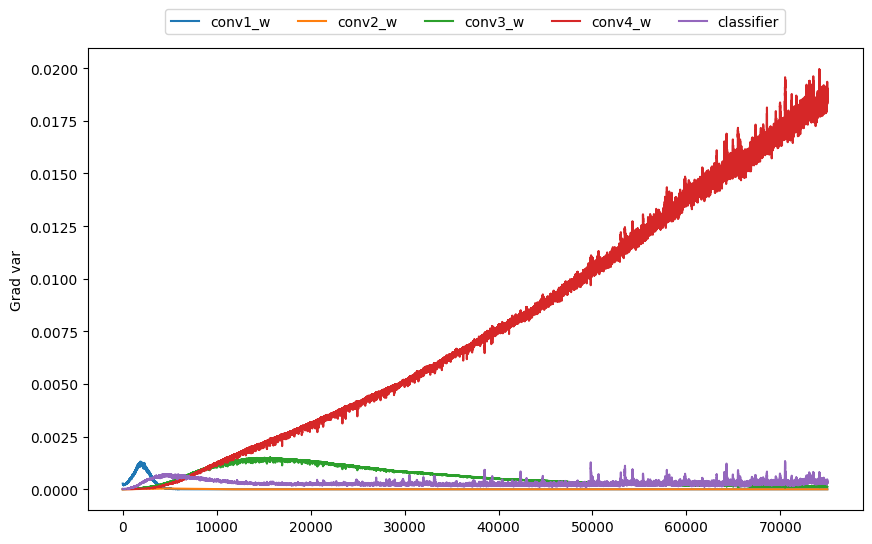

In [213]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_var', 
                    'layer_dict.conv1.conv.weight_grad_var', 
                    'layer_dict.conv2.conv.weight_grad_var',
                    'layer_dict.conv3.conv.weight_grad_var',
                    'layer_dict.linear.weights_grad_var'
]
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier'
]

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Grad var')  



plt.show()  # 그래프 보여주기

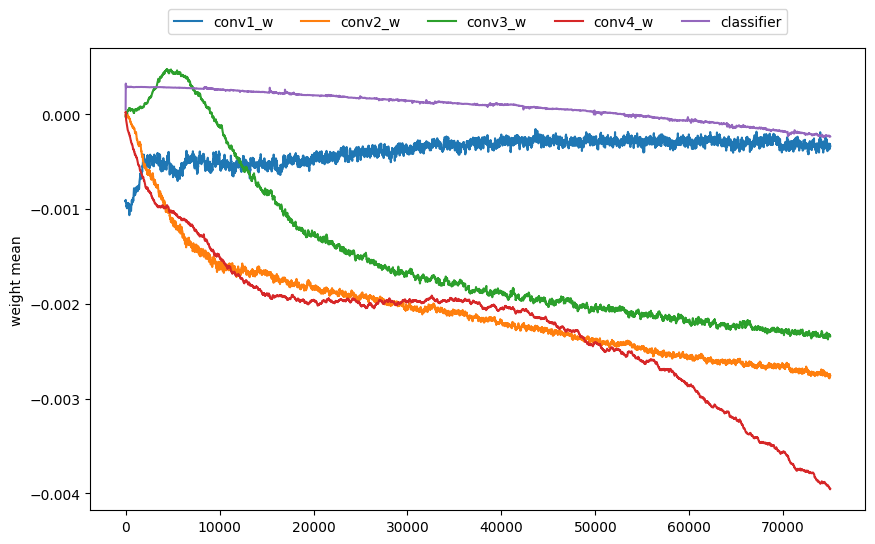

In [204]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_mean', 
                    'layer_dict.conv1.conv.weight_weight_mean', 
                    'layer_dict.conv2.conv.weight_weight_mean',
                    'layer_dict.conv3.conv.weight_weight_mean',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight mean')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

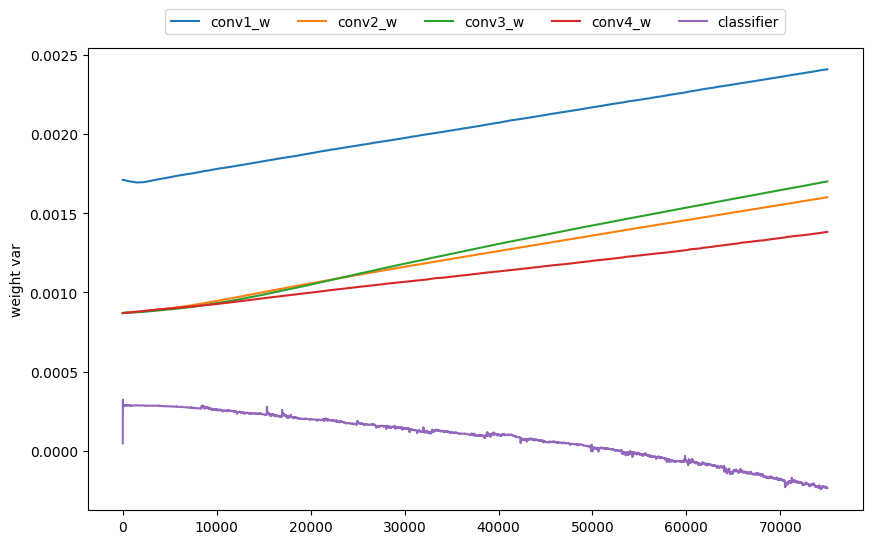

In [205]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_var', 
                    'layer_dict.conv1.conv.weight_weight_var', 
                    'layer_dict.conv2.conv.weight_weight_var',
                    'layer_dict.conv3.conv.weight_weight_var',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight var')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

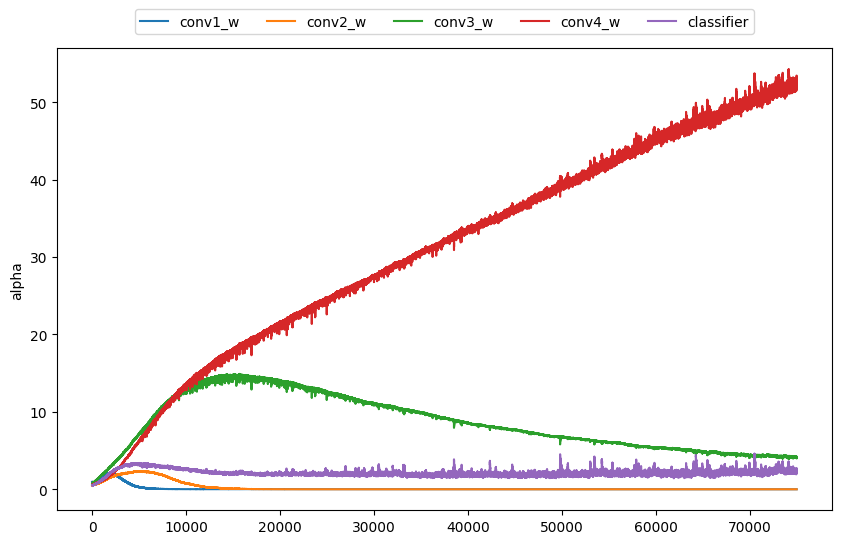

In [206]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_alpha', 
                    'layer_dict.conv1.conv.weight_alpha', 
                    'layer_dict.conv2.conv.weight_alpha',
                    'layer_dict.conv3.conv.weight_alpha',
                    'layer_dict.linear.weights_alpha']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('alpha')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

In [ ]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'gr_var1', 
                    'gr_var2', 
                    'gr_var3'
                  ]
columns_to_plot_label = ['conv2_w', 
                         'conv3_w', 
                         'conv4_w'
                        ]

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('alpha_var')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기